In [6]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

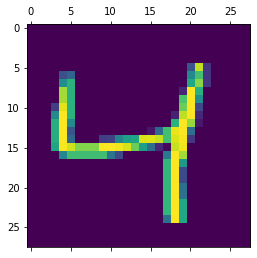

In [13]:
plt.matshow(x_train[2])

In [14]:
y_train[2]

4

In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train_flat=x_train.reshape(len(x_train),28*28)

In [24]:
x_test_flat=x_test.reshape(len(x_test),28*28)

# sequential means stack of layers in neurak network..accepts every layer as one element   ||   dense means all neurons in one are connected to all other in other layer

In [25]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4703 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2838 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258


In [26]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9259


[0.2656252384185791, 0.9258999824523926]

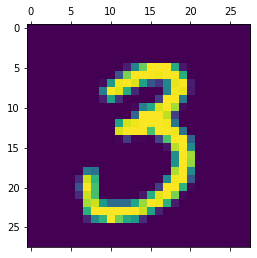

In [30]:
plt.matshow(x_test[90])

In [31]:
y_predicted=model.predict(x_test_flat)


In [32]:
np.argmax(y_predicted[90])

3

In [33]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [35]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1111,    4,    1,    1,    1,    4,    2,   11,    0],
       [   5,    7,  930,   15,   10,    5,   13,    9,   34,    4],
       [   2,    0,   23,  922,    1,   23,    2,    9,   20,    8],
       [   1,    1,    4,    1,  924,    0,   10,    3,   10,   28],
       [  11,    2,    4,   33,   11,  781,   14,    3,   28,    5],
       [   7,    3,    6,    1,    8,   13,  915,    2,    3,    0],
       [   1,    5,   26,    8,   10,    1,    0,  937,    2,   38],
       [   8,    7,    7,   21,    9,   29,    8,   10,  868,    7],
       [  11,    7,    1,   10,   40,    8,    0,   16,    5,  911]])>

# now we will add the hidden layer in the same code

# second layer ko input shape ni chahiye..1st ke ouput se apne aap utha legi wo.. first ka output..hit and trial krlo..no specific method

In [36]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2721 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1224 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0862 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0655 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0515 - accuracy: 0.9837


In [37]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9754


[0.08014436811208725, 0.9753999710083008]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [39]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1111,    4,    1,    1,    1,    4,    2,   11,    0],
       [   5,    7,  930,   15,   10,    5,   13,    9,   34,    4],
       [   2,    0,   23,  922,    1,   23,    2,    9,   20,    8],
       [   1,    1,    4,    1,  924,    0,   10,    3,   10,   28],
       [  11,    2,    4,   33,   11,  781,   14,    3,   28,    5],
       [   7,    3,    6,    1,    8,   13,  915,    2,    3,    0],
       [   1,    5,   26,    8,   10,    1,    0,  937,    2,   38],
       [   8,    7,    7,   21,    9,   29,    8,   10,  868,    7],
       [  11,    7,    1,   10,   40,    8,    0,   16,    5,  911]])>

# but har baar flatten krna pad rha..keras mei already ek flatten layer hoti hai.toh usko use krte hn ab..dekhiye kaisee

In [42]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9844
